In [1]:
#先test产生outputs
from baseline import LanguagePlusImage
from Config import Config
from data import ReferExpressionDataset
from refer import REFER

use_train_dataset = False

cfg = Config()
refer = REFER(cfg, train=True)
refer_val = REFER(cfg, False)

dataset = ReferExpressionDataset(cfg, refer, split=False) # 用来训练的
val_dataset = ReferExpressionDataset(cfg, refer_val) # 用来验证的
#test_dataset = ReferExpressionDataset(cfg, refer, split=True, test=True)
test_dataset = ReferExpressionDataset(cfg, refer_val, test=True)
test_train_dataset = ReferExpressionDataset(cfg, refer, test=True,split=False) # 用训练数据测试看看，安慰自己
model = LanguagePlusImage(cfg)

loading dataset into memory...
creating index...
index created.
DONE (t=2.91s)
loading dataset into memory...
creating index...
index created.
DONE (t=0.78s)
Using cuda
Using cuda
Using cuda
Freeze image network weights


In [2]:
checkpt_file = 'checkpoints/full.mdl.checkpoint7'
model.load_model(checkpt_file)

=> loading checkpoint 'checkpoints/full.mdl.checkpoint7'
=> loaded checkpoint 'checkpoints/full.mdl.checkpoint7' (epoch 7)


In [3]:
if use_train_dataset:
    outputs = model.run_test(test_train_dataset)
else:
    outputs = model.run_test(test_dataset)

Test None:   2%|█▎                                                                  | 101/5000 [00:28<22:55,  3.56it/s]


In [4]:
# 下面是从可视化那边抄过来的
import scipy
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import matplotlib.patches as mpatches
import sys
import os

# Import Refexp python class
# Please MAKE SURE that ./google_refexp_py_lib is in your
# python library search path
sys.path.append("google_refexp_py_lib")
from refexp import Refexp

In [5]:
# Specify datasets path
if use_train_dataset:
    refexp_filename='./google_refexp_dataset_release/google_refexp_train_201511_coco_aligned.json'
else:
    refexp_filename='./google_refexp_dataset_release/google_refexp_val_201511_coco_aligned.json'
coco_filename='../Google_Refexp_toolbox-master/external/coco/annotations/instances_train2014.json'
imagesDir = '../Google_Refexp_toolbox-master/external/coco/images'
imagesType = 'train2014'

# Create Refexp instance.
refexp = Refexp(refexp_filename, coco_filename)

loading annotations into memory...
Done (t=14.23s)
creating index...
index created!
Dataset loaded.


In [6]:
import random

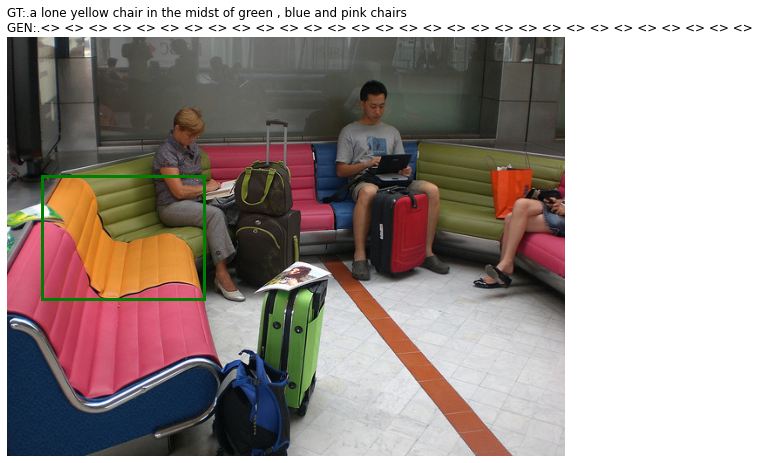

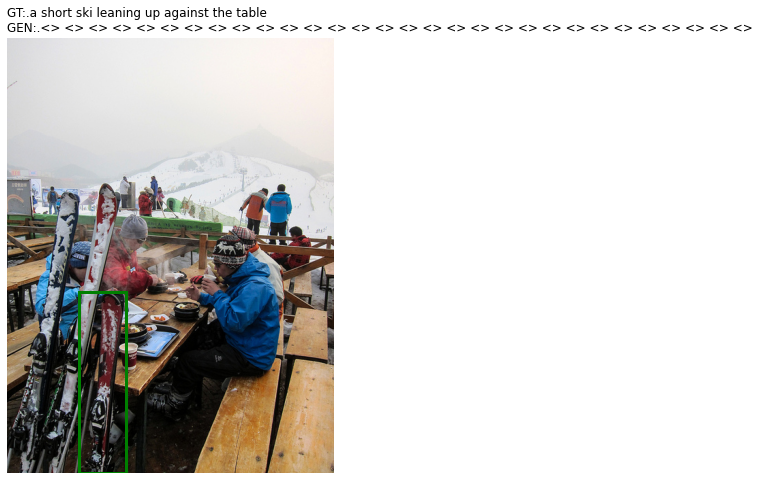

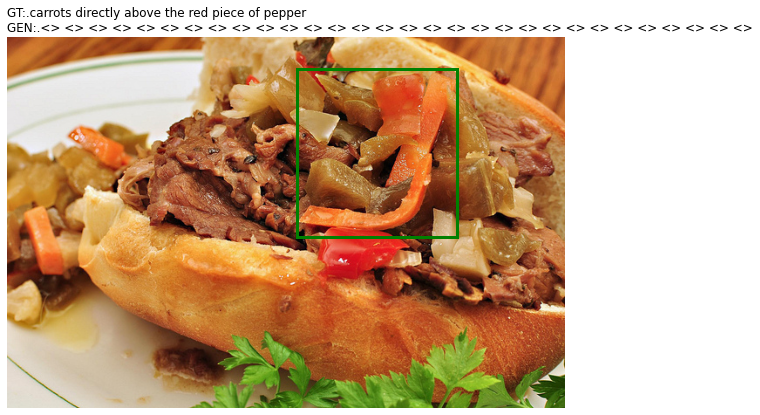

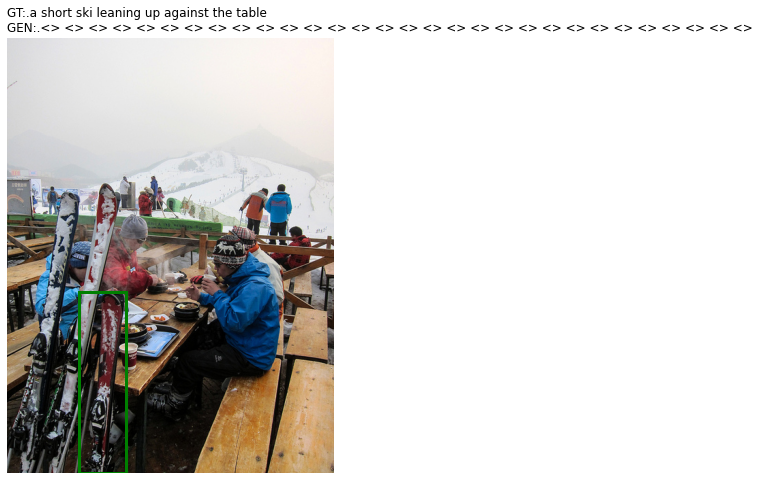

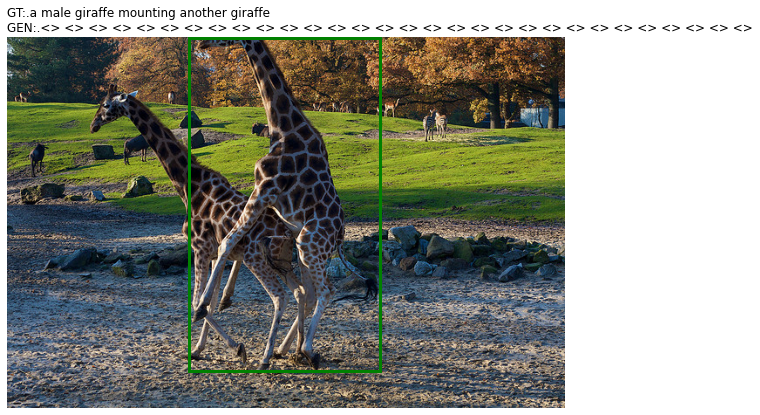

In [7]:
for i in range(5):
    output = random.choice(outputs)


    img_id = output['imgID'].numpy()[0]
    ann_id = output['annID'][0].numpy()[0]
    img = refexp.loadImgs(img_id)[0]
    # Plot image and all region candidates from multibox detector.
    I = io.imread(os.path.join(imagesDir, imagesType, img['file_name']))
    plt.figure()
    plt.imshow(I)
    ax = plt.axis('off')
    plt.title("GT:.{}\nGEN:.{}".format(output['gt_sentence'],output['gen_sentence']),loc ='left')
    #     plt.title('Multibox Region Candidates for this image')
    #     refexp.showRegionCandidates(img)
    #anns = refexp.getAnnIds(img_id)
    ann = refexp.loadAnns(ann_id)[0]
    refexp.showAnn(ann, printRefexps=False)
    # print("GT:.{}\n".format(output['gt_sentence']))
    # print("GEN:.{}\n".format(output['gen_sentence']))
    if use_train_dataset:
        plt.savefig('result_img_use_train_data\{}.png'.format(img_id))
    else:
        plt.savefig('val_result_img_119\{}.png'.format(img_id))
    

In [10]:
print(model)

LanguagePlusImage(
  (loss_function): SequenceLoss(
    (Loss): CrossEntropyLoss()
  )
  (wordnet): LanguageModel(
    (loss_function): SequenceLoss(
      (Loss): CrossEntropyLoss()
    )
    (embedding): Embedding(12735, 1024, padding_idx=0)
    (dropout1): Dropout(p=0.5, inplace=False)
    (lstm): LSTM(3029, 1024, batch_first=True)
    (dropout2): Dropout(p=0.5, inplace=False)
    (hidden2vocab): Linear(in_features=1024, out_features=12735, bias=True)
  )
  (imagenet): VGG(
    (VGG): VGG(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
        (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (6): ReLU(inplace=True)
        (7): Conv2d(128, 128, kernel_size=(3, 3), s

In [8]:
for k in model.parameters():
    print(k)

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [-0.8470,  2.2898, -0.9179,  ..., -2.2062, -0.9402, -1.1411],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., 

          [-2.1999e-02,  3.7065e-03,  2.3179e-03]]]], device='cuda:0')
Parameter containing:
tensor([ 0.0081,  0.0008,  0.0921,  0.0401, -0.0459,  0.0429,  0.0023,  0.0654,
         0.0898,  0.0891,  0.0697,  0.2036, -0.1984, -0.0156, -0.0234, -0.0090,
        -0.0117,  0.0390, -0.0326,  0.2342,  0.1007,  0.0658,  0.0196,  0.1381,
        -0.1318,  0.0273,  0.2149,  0.0126,  0.0744,  0.1737, -0.1128,  0.1259,
         0.0321,  0.1362,  0.0060,  0.0778,  0.1610,  0.2223,  0.1665, -0.0132,
        -0.0238,  0.1425,  0.1552,  0.0869,  0.1412, -0.0429,  0.0677,  0.0206,
         0.1080,  0.2640,  0.1063, -0.0261, -0.0140,  0.1273,  0.0410, -0.1462,
        -0.0257,  0.0140,  0.0486, -0.0092,  0.0228,  0.0428,  0.0226,  0.0066,
         0.0014,  0.1270,  0.0320,  0.0989, -0.0172,  0.1474,  0.0830,  0.1477,
         0.2371,  0.0403, -0.0558,  0.0189,  0.0474, -0.0311,  0.0552,  0.0268,
         0.0219, -0.1241, -0.0402,  0.0836,  0.0670,  0.0083,  0.0702,  0.1147,
         0.1347, -0.0128,  

         1.6769e-01, -2.0959e-03], device='cuda:0')
Parameter containing:
tensor([[[[-3.4618e-02, -3.3801e-02, -2.2497e-02],
          [-3.2275e-02, -2.8543e-02, -1.5026e-02],
          [-3.1307e-02, -1.8263e-02, -1.1662e-02]],

         [[-6.7787e-03, -5.1631e-03, -1.1498e-02],
          [-3.1353e-03, -9.5856e-03, -1.1940e-02],
          [-1.6923e-02, -1.5893e-02, -9.2058e-03]],

         [[ 2.1721e-02,  1.6138e-03, -1.2762e-02],
          [ 1.1541e-02,  3.9117e-03, -1.7966e-02],
          [ 8.2566e-03, -7.2988e-03, -1.8711e-02]],

         ...,

         [[ 1.1666e-02,  5.8356e-03,  5.1317e-03],
          [ 2.7172e-02,  3.0096e-02,  2.2107e-02],
          [ 5.0745e-02,  5.0426e-02,  5.2568e-02]],

         [[ 1.5641e-02,  6.1531e-03,  1.0435e-02],
          [-4.9628e-03, -1.0472e-02, -9.7399e-03],
          [-1.3043e-02, -1.1895e-02, -8.3080e-03]],

         [[-7.5200e-03, -8.6918e-03, -7.7642e-03],
          [-2.1090e-02, -1.2527e-02, -1.4423e-02],
          [-1.5833e-02, -1.0271e-0

Parameter containing:
tensor([[[[ 2.7768e-02,  1.5296e-02,  2.1911e-02],
          [ 2.5202e-02,  2.3223e-02,  2.0005e-02],
          [ 3.0154e-02,  8.7023e-03,  1.7728e-02]],

         [[-1.0682e-02, -9.5476e-03, -9.1195e-03],
          [-3.5036e-03, -1.2508e-02, -1.4557e-02],
          [-1.3689e-02, -1.8028e-02, -2.1646e-02]],

         [[-8.5565e-03, -7.2054e-03, -6.3846e-03],
          [ 2.0408e-03, -2.1947e-03, -6.8919e-04],
          [-1.6638e-03, -9.0286e-04,  4.9448e-04]],

         ...,

         [[-3.4711e-03,  3.3385e-03,  2.6684e-03],
          [-9.6592e-03, -1.1543e-02, -8.2975e-03],
          [ 3.4230e-03,  5.5182e-03,  1.2600e-02]],

         [[-6.8517e-03, -4.8486e-03, -8.5124e-03],
          [ 1.0570e-03,  1.1698e-02, -1.0812e-03],
          [ 6.2322e-03,  7.0932e-04, -1.5733e-03]],

         [[-2.1647e-02,  2.5883e-03,  1.1418e-02],
          [-2.7891e-02,  1.8448e-03,  1.1855e-02],
          [-1.2538e-02, -1.8912e-03,  9.2639e-03]]],


        [[[-1.1915e-02, -2.5141

In [11]:
metrics_dict # epoch59

{'Bleu_1': 0.2398119122255174,
 'Bleu_2': 0.13099085311749176,
 'Bleu_3': 0.07465980213578721,
 'Bleu_4': 0.044328477951474404,
 'ROUGE_L': 0.26149454634361863,
 'CIDEr': 0.5454229582292395}

In [6]:
metrics_dict # epoch0

{'Bleu_1': 0.16666666666653115,
 'Bleu_2': 0.08421519210658034,
 'Bleu_3': 0.04361189162562954,
 'Bleu_4': 0.02278064487991391,
 'ROUGE_L': 0.21829095420102115,
 'CIDEr': 0.33197397218812}

In [9]:
import torch
a  = torch.tensor([1,inf,inf])
a.clamp_(-1,1)

NameError: name 'inf' is not defined

In [10]:
b = torch.tensor(0.5)

In [11]:
b

tensor(0.5000)

In [12]:
b.requires_grad

False